# Import libraries

## Ipython notebook magic

In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload

## Python libraries

In [21]:
import pylab
import csv
import sys
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import glob
import re
import time
import datetime
import pandas as pd
from scipy.optimize import curve_fit

# Get the data

In [24]:
data = pd.read_csv('../data/svd_data.csv', index_col=0)

Text(0,0.5,'Intensity')

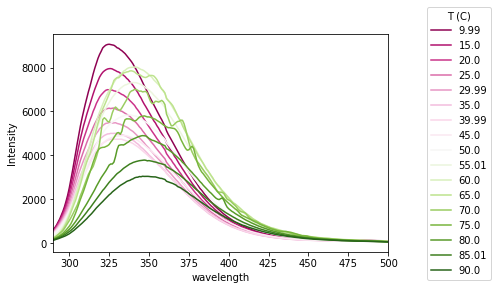

In [34]:
data.plot(colormap=plt.get_cmap('PiYG'))
plt.legend(title = 'T (C)', 
           loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.ylabel('Intensity')

## SVD

In [26]:
data.shape

(211, 17)

In [27]:
U, S, V = scipy.linalg.svd(data.values, full_matrices=True)
U.shape,  S.shape, V.shape

((211, 211), (17,), (17, 17))

## Plot results

Contribution of individual eigen shapes to the data

Text(0,0.5,'Cumulative weight, %')

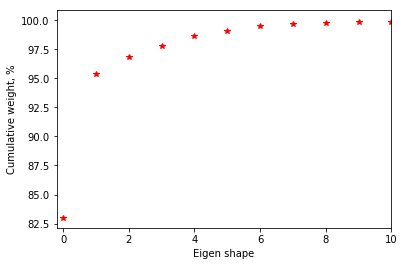

In [32]:
plt.plot(np.cumsum(S)/sum(S)*100, 'r*')
plt.xlim(-0.2, 10)
plt.xlabel('Eigen shape')
plt.ylabel('Cumulative weight, %')

Singular shapes

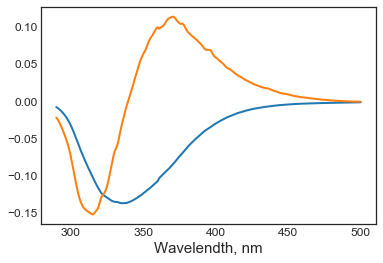

In [133]:
_ = plt.plot(data.index, U[:,:2])
_ = plt.xlabel('Wavelendth, nm')

Singular trends

In [54]:
max_wav_norm = ((data.idxmax() - data.idxmax().mean())/
                (data.idxmax().max() - data.idxmax().mean())
               ).values
max_int_norm = (data.max()/data.max().max()).values

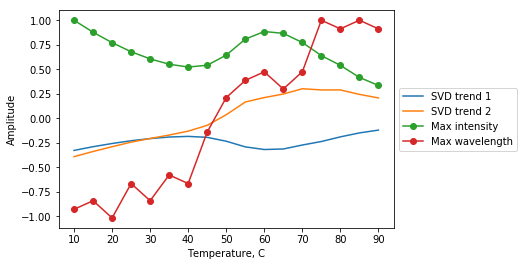

In [55]:
_ = plt.plot(np.array(data.columns).astype('float'), V[0], label = 'SVD trend 1')
_ = plt.plot(np.array(data.columns).astype('float'), V[1], label = 'SVD trend 2')
plt.xlabel('Temperature, C')
plt.ylabel('Amplitude')
_ = plt.plot(np.array(data.columns).astype('float'), max_int_norm, label = 'Max intensity', marker = 'o')
_ = plt.plot(np.array(data.columns).astype('float'), max_wav_norm, label = 'Max wavelength', marker = 'o')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))